In [83]:
import os
import matplotlib.pyplot as plt
import ssf_functions as ssf
import numpy as np

dsms_path = "/media/seba/Samsung_2TB/Analysis/QGIS/Niederhasli/dsm/dsms_C"
dsms_list = os.listdir(dsms_path)

for dsm in dsms_list[:]:
    if dsm.split(".")[0].split("_")[-1] != "9":
        dsms_list.remove(dsm)

dsms_list

['niederhasli_20190527_rgb_dsm_C_9.tif',
 'niederhasli_20190719_rgb_dsm_C_9.tif',
 'niederhasli_20191007_rgb_dsm_C_9.tif']

In [121]:
dsm_shape = ssf.read_geotiff(os.path.join(dsms_path, dsms_list[0])).shape
dsms = np.zeros(dsm_shape + (3,))
dsms.shape

(5237, 3600, 3)

In [122]:
for i, dsm in enumerate(dsms_list):
    dsm = ssf.read_geotiff(os.path.join(dsms_path, dsms_list[i]))
    mask_nan = dsm==0
    dsm[mask_nan] = np.nan
    dsms[:,:,i] = dsm

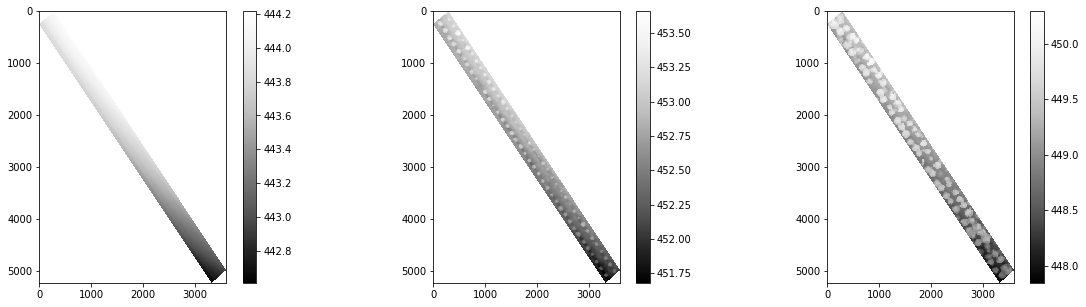

In [123]:
fig, axs = plt.subplots(figsize=(20,5), ncols=3)

gs = []
n_imgs = len(dsms_list)
for i in range(n_imgs):
    g = axs[i].imshow(dsms[:,:,i], cmap="Greys_r")
    gs.append(g)

for i in range(n_imgs):
    fig.colorbar(gs[i], ax=axs[i])

plt.show()

# Computer relative differences
Despite the use of an RTK-GPS, the absolute differences don't quite match. A shift of the minimum value of ~10m can be observed. Assuming that relative differences are quite correct, convert everything to relative differences.

In [124]:
for i in range(n_imgs):
    dsms[:,:,i] = dsms[:,:,i] - np.min(dsms[:,:,i][~mask_nan])
dsms[1000,3000,:]

array([nan, nan, nan])

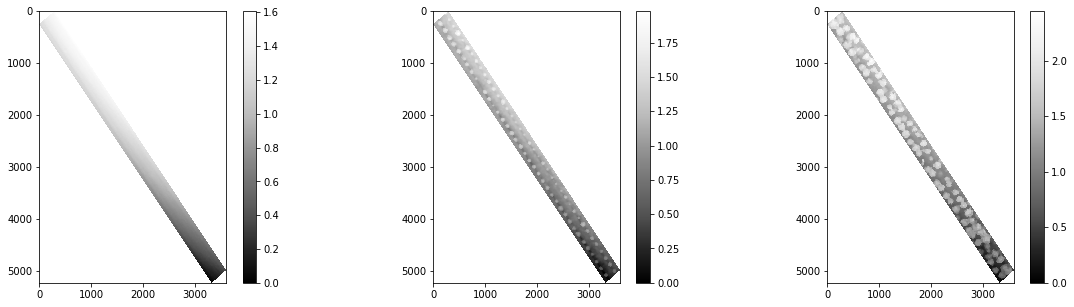

In [89]:
fig, axs = plt.subplots(figsize=(20,5), ncols=3)

gs = []
for i in range(n_imgs):
    g = axs[i].imshow(dsms[:,:,i], cmap="Greys_r")
    gs.append(g)

for i in range(n_imgs):
    fig.colorbar(gs[i], ax=axs[i])

plt.show()

# Remove the terrain
The plants at the time of the first flight were very small (~20cm high). We take this as reference DSM and substract it from the others in order to obtain the plants volume on the 19/07/2019 and on the 07/10/2019

In [125]:
import copy

dsm_ref = copy.deepcopy(dsms[:,:,0])
for i in range(n_imgs):
    dsms[:,:,i] = dsms[:,:,i] - dsm_ref

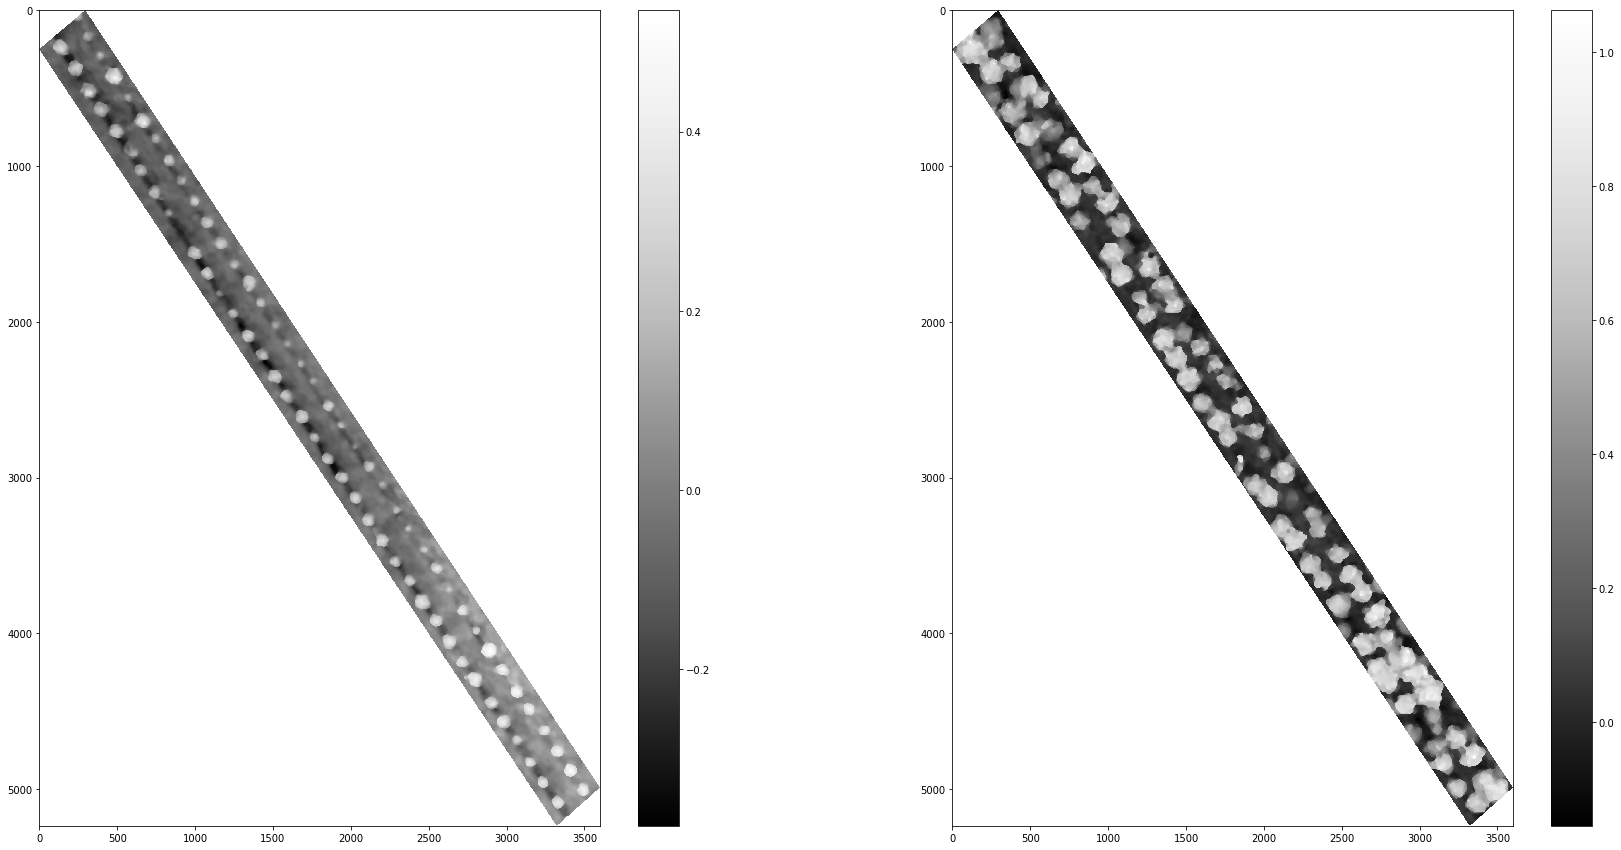

In [127]:
fig, axs = plt.subplots(figsize=(30,15), ncols=2)

gs = []
for i in range(2):
    g = axs[i].imshow(dsms[:,:,i+1], cmap="Greys_r")
    gs.append(g)

for i in range(2):
    fig.colorbar(gs[i], ax=axs[i])

plt.show()